In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [50]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [10]:
# Declare a Base using `automap_base()`
Base = automap_base()


In [11]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [12]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [14]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement

# the station class to a variable called `Station`
Station = Base.classes.station

In [15]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [80]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [370]:
# Calculate the date one year from the last date in data set.
query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").all()

#create a dataframe and name columns
weather = pd.DataFrame(query, columns=['Date','Precipitation'])

#drop rows with null values
weather = weather.dropna()

#sort values by date
weather = weather.sort_values(by='Date')

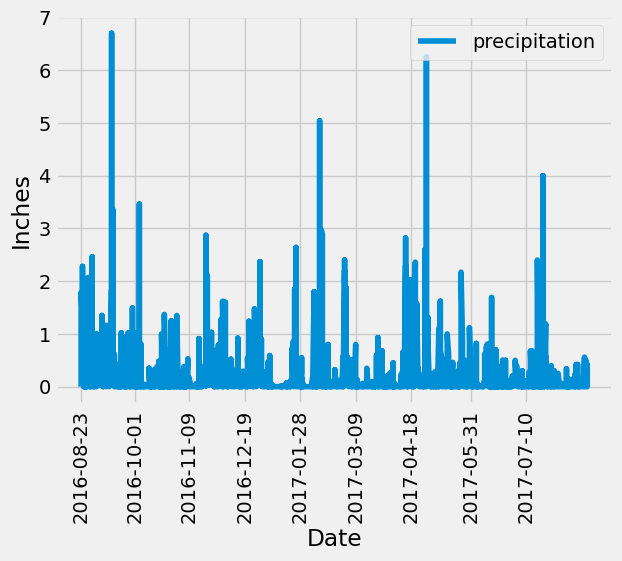

In [373]:
labels = ['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']

#plot chart with the
plt.plot(weather['Date'], weather['Precipitation'])
plt.xticks(labels,rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'],loc='upper right')



In [143]:
# Use Pandas to calculate the summary statistics for the precipitation data
weather.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [208]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [376]:
#List the stations and observation counts in descending order
counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Answer the following question: which station id has the greatest number of observations?
The "Waihee 837.5, HI US" or USC00519281 is the station with the greatest number of observations.

In [223]:
engine.execute(text('Select * FROM Station')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [350]:
#Design a query that calculates the lowest, highest, and average temperatures 
#that filters on the most-active station id found in the previous query.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
station_summary = session.query(*sel).filter(Measurement.station == 'USC00519281').\
group_by(Measurement.station)

#print the values mentioned above
for s in station_summary:
    print(s)

(54.0, 85.0, 71.66378066378067)


In [377]:
#Query the previous 12 months of temperature observations
previous_twelve = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(func.strftime("%Y-%m-%d", Measurement.date) >= "2016-08-23").\
                group_by(Measurement.date).order_by(Measurement.date).all()

#create dataframe that will be used to plot histogram
prev_12_df = pd.DataFrame(previous_twelve, columns=['Date', 'Temperature'])

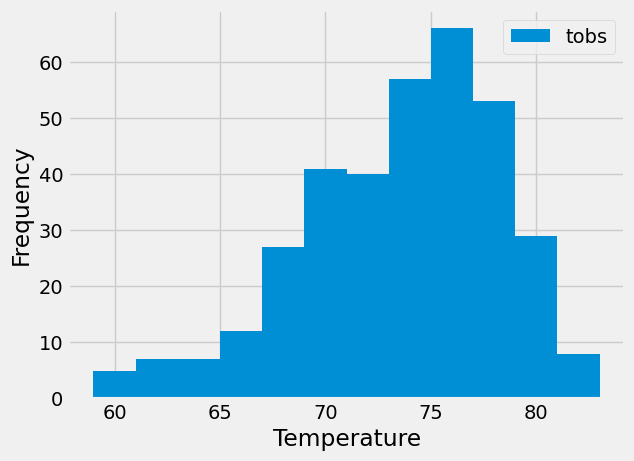

In [369]:
#plot results as a histogram with 12 bins 
plt.hist(prev_12_df['Temperature'],bins=12,density=False)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

# Close Session

In [ ]:
# Close Session
session.close()
